<a href="https://colab.research.google.com/github/RaicLee/Jpub_AI22/blob/master/Chapter4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정책 경사법 </br>
(1) 세타 준비</br>
(2) 파라미터 세타를 정책으로 변환 </br>
(3) 정책에 따라 골인지점에 이를 때까지 행동 반복</br>
(4) 성공한 행동을 많이 하도록 파라미터 세타를 변경 </br>
(5) 정책 변화량이 임계값 이하가 될때까지 (2)~(4) 반복 </br>



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.display import HTML


In [0]:
def drawwall(lis1,lis2):
  plt.plot(lis1,lis2,color='k')

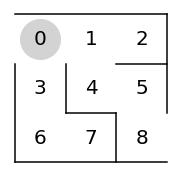

In [6]:
#maze
fig=plt.figure(figsize=(3,3))

#wall
drawwall([0,3],[3,3])
drawwall([0,3],[0,0])
drawwall([0,0],[0,2])
drawwall([3,3],[1,3])
drawwall([1,1],[1,2])
drawwall([2,3],[2,2])
drawwall([2,1],[1,1])
drawwall([2,2],[0,1])

for i in range(3):
  for j in range(3):
    plt.text(0.5+i,2.5-j,str(i+j*3),size=20,ha='center',va='center')
  
circle,=plt.plot([0.5],[2.5],marker='o',color='#d3d3d3',markersize=40)

plt.tick_params(axis='both',which='both',bottom=False,top=False,labelbottom=False,right=False,left=False,labelleft=False)
plt.box(False)



